<a href="https://colab.research.google.com/github/jtsheppard/DS-Unit-2-Applied-Modeling/blob/master/Tyler_Sheppard_DS_Sprint_Challenge_8_Regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science, Unit 2_
 
# Regression 2 Sprint Challenge: Predict drugstore sales 🏥

For your Sprint Challenge, you'll use real-world sales data from a German drugstore chain, from Jan 2, 2013 — July 31, 2015.

You are given three dataframes:

- `train`: historical sales data for 100 stores
- `test`: historical sales data for 100 different stores
- `store`: supplemental information about the stores


The train and test set do _not_ have different date ranges. But they _do_ have different store ids. Your task is _not_ to forecast future sales from past sales. **Your task is to predict sales at unknown stores, from sales at known stores.**

In [0]:
import pandas as pd
train = pd.read_csv('https://drive.google.com/uc?export=download&id=1E9rgiGf1f_WL2S4-V6gD7ZhB8r8Yb_lE')
test = pd.read_csv('https://drive.google.com/uc?export=download&id=1vkaVptn4TTYC9-YPZvbvmfDNHVR8aUml')
store = pd.read_csv('https://drive.google.com/uc?export=download&id=1rZD-V1mWydeytptQfr-NL7dBqre6lZMo')
assert train.shape == (78400, 7)
assert test.shape == (78400, 7)
assert store.shape == (200, 10)

The dataframes have a variety of columns:

- **Store** - a unique Id for each store
- **DayOfWeek** - integer, 1-6
- **Date** - the date, from Jan 2, 2013 — July 31, 2015.
- **Sales** - the units of inventory sold on a given date (this is the target you are predicting)
- **Customers** - the number of customers on a given date
- **Promo** - indicates whether a store is running a promo on that day
- **SchoolHoliday** - indicates the closure of public schools
- **StoreType** - differentiates between 4 different store models: a, b, c, d
- **Assortment** - describes an assortment level: a = basic, b = extra, c = extended
- **CompetitionDistance** - distance in meters to the nearest competitor store
- **CompetitionOpenSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened
- **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
- **Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2
- **PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

This Sprint Challenge has three parts. To demonstrate mastery on each part, do all the required instructions. To earn a score of "3" for the part, also do the stretch goals.

## 1. Wrangle relational data, Log-transform the target
- Merge the `store` dataframe with the `train` and `test` dataframes. 
- Arrange the X matrix and y vector for the train and test sets.
- Log-transform the target for the train and test set.
- Plot the target's distribution for the train set, before and after the transformation.

#### Stretch goals
- Engineer 3+ more features.

In [2]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,SchoolHoliday
0,4,5,2015-07-31,13995,1498,1,1
1,8,5,2015-07-31,8492,833,1,1
2,11,5,2015-07-31,10457,1236,1,1
3,12,5,2015-07-31,8959,962,1,1
4,34,5,2015-07-31,11144,1162,1,1


In [0]:
#merging data
train = train.merge(store, how='left')
test = test.merge(store, how='left')


In [4]:
train.shape

(78400, 16)

In [5]:
test.shape

(78400, 16)

In [6]:
#cinfirming merge
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,4,5,2015-07-31,13995,1498,1,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
1,8,5,2015-07-31,8492,833,1,1,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
2,11,5,2015-07-31,10457,1236,1,1,a,c,960.0,11.0,2011.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct"
3,12,5,2015-07-31,8959,962,1,1,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
4,34,5,2015-07-31,11144,1162,1,1,c,a,2240.0,9.0,2009.0,0,NaN,NaN,NaN


In [0]:
#Arrange the X matrix and y vector for the train and test sets.
import numpy as np
from sklearn.model_selection import train_test_split

trainval = train
trainval_store = trainval['Store'].unique()
train_store, val_store = train_test_split(trainval_store, random_state=42)
train = trainval[trainval.Store.isin(train_store)]
val = trainval[trainval.Store.isin(val_store)]
target = 'Sales'
x_train = train.drop(columns=target)
x_val = val.drop(columns=target)
x_test = test.drop(columns=target)
y_test = test[target]
y_train = train[target]
y_val = val[target]
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)
y_test_log = np.log1p(y_test) 

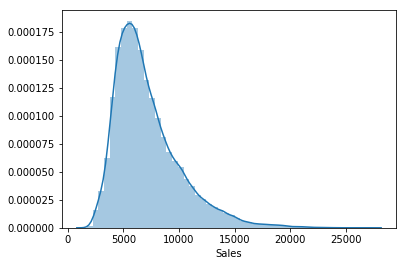

In [8]:
#Log-transform the target for the train and test set.
#viewing plot distrobution before log transform
import seaborn as sns
% matplotlib inline
sns.distplot(y_train);

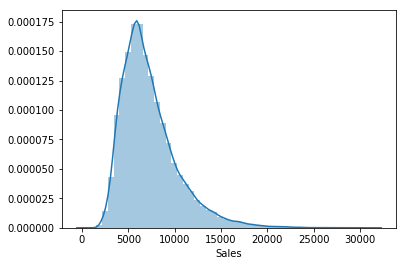

In [9]:
sns.distplot(y_test);

In [0]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

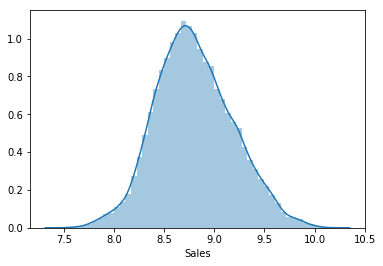

In [11]:
#ploting after log transform
% matplotlib inline
sns.distplot(y_train_log);

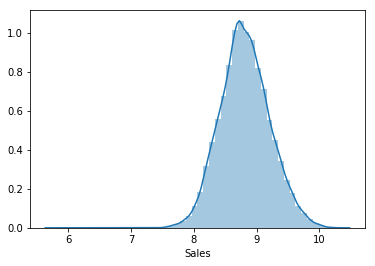

In [12]:
sns.distplot(y_test_log);

In [0]:
#I did it, yay. 
#I kknow it said just the train set but I wanted to check both

## 2. Fit and validate your model
- **Use Gradient Boosting** or any type of regression model.
- **Beat the baseline:** The estimated baseline Root Mean Squared Logarithmic Error is 0.90, if we guessed the mean sales for every prediction. Remember that RMSE with the log-transformed target is equivalent to RMSLE with the original target. Try to get your error below 0.20.
- **To validate your model, choose any one of these options:**
  - Split the train dataframe into train and validation sets. Put all dates for a given store into the same set. Use xgboost `early_stopping_rounds` with the validation set. 
  - Or, use scikit-learn `cross_val_score`. Put all dates for a given store into the same fold.
  - Or, use scikit-learn `RandomizedSearchCV` for hyperparameter optimization. Put all dates for a given store into the same fold.
- **Get the Validation Error** (multiple times if you try multiple iterations) **and Test Error** (one time, at the end).
  
#### Stretch goal
- Optimize 3+ hyperparameters by searching 10+ "candidates" (possible combinations of hyperparameters). 

In [14]:
!pip install category_encoders

In [15]:
#XBG Regressor
import category_encoders as ce
from xgboost import XGBRegressor

encoder = ce.OrdinalEncoder()
xtre = encoder.fit_transform(x_train)
xve = encoder.transform(x_val)

x_test = encoder.transform(x_test)


eval_set = [(xtre, y_train_log), (xve, y_val_log)]

model = XGBRegressor(n_estimators=2000, n_jobs=-1)
model.fit(xtre, y_train_log, eval_set=eval_set, eval_metric='rmse', early_stopping_rounds=50)

[02:47:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:7.47822	validation_1-rmse:7.39615
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[1]	validation_0-rmse:6.73097	validation_1-rmse:6.64893
[2]	validation_0-rmse:6.05845	validation_1-rmse:5.97748
[3]	validation_0-rmse:5.45322	validation_1-rmse:5.3726
[4]	validation_0-rmse:4.90853	validation_1-rmse:4.82896
[5]	validation_0-rmse:4.41837	validation_1-rmse:4.34105
[6]	validation_0-rmse:3.97723	validation_1-rmse:3.90139
[7]	validation_0-rmse:3.58027	validation_1-rmse:3.50594
[8]	validation_0-rmse:3.22306	validation_1-rmse:3.14983
[9]	validation_0-rmse:2.90161	validation_1-rmse:2.82914
[10]	validation_0-rmse:2.61238	validation_1-rmse:2.54134
[11]	validation_0-rmse:2.3521	validation_1-rmse:2.28286
[12]	validation_0-rmse:2.11793	validation_1-rmse:2.0493
[13]	validation_0-rmse:1.90726	validation_1-rmse:1.84017
[14]	validation_0-rmse:1.71775	validation_1-rmse:1.65179
[15]	validation_0-rmse:1.54729	validation_1-rmse:1.48407
[16]	validation_0-rmse:1.39396	validation_1-rmse:1.33068
[17]	validation_0-rmse:1.2561	validation_1-rmse:1.19416
[18]	validation_0-rmse:1.13215	validation_1-

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=2000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [16]:
#val/test error
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
  return np.sqrt(mean_squared_error(y_true, y_pred))

y_pred_log = model.predict(xve)
print('Validation score', rmse(y_val_log, y_pred_log))
y_pred_log = model.predict(x_test)
print('Test score', rmse(y_test_log, y_pred_log))


Validation score 0.14675346731105396
Test score 0.1458119756125263


## 3. Plot model interpretation visualizations
- Choose any one of these options:
  - Permutation Importances plot
  - Partial Dependency Plot, 1 feature isolation
  - Partial Dependency Plot, 2 feature interaction
  
#### Stretch goals
- Plot 2+ visualizations.
- Use permutation importances for feature selection. 

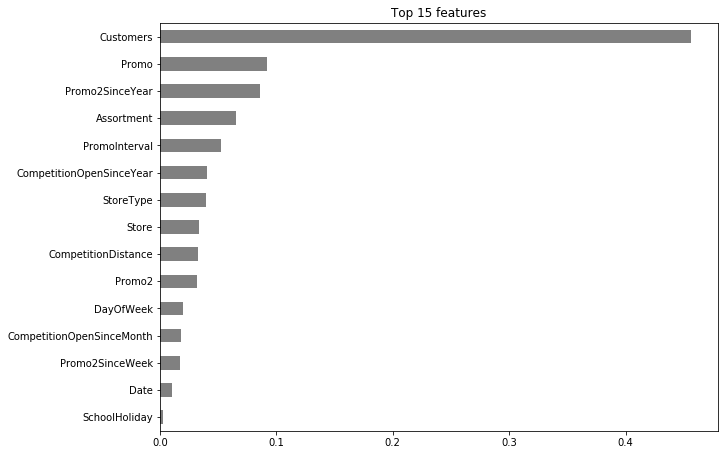

In [17]:
import matplotlib.pyplot as plt
# Get feature importances
importances = pd.Series(model.feature_importances_, xtre.columns)

# Plot feature importances
n = len(xtre.columns)
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [18]:
!pip install eli5

In [19]:
#Permutation Importances plot
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(model, scoring='neg_mean_squared_error',
                                 cv='prefit', n_iter=4, random_state=42)

permuter.fit(xve, y_val_log)
feature_names = xve.columns.tolist()
eli5.show_weights(permuter, top=None, feature_names=feature_names)

ValueError: ignored

In [0]:
#forgot to take out NaN values

xve.fillna(xve.mean(), inplace=True)

In [21]:
#let's try that again
permuter = PermutationImportance(model, scoring='neg_mean_squared_error',
                                 cv='prefit', n_iter=4, random_state=42)

permuter.fit(xve, y_val_log)
feature_names = xve.columns.tolist()
eli5.show_weights(permuter, top=None, feature_names=feature_names)

Weight,Feature
0.1808 ± 0.0013,Customers
0.0091 ± 0.0002,Promo
0.0033 ± 0.0002,StoreType
0.0029 ± 0.0002,Store
0.0020 ± 0.0001,Assortment
0.0019 ± 0.0001,Date
0.0018 ± 0.0001,CompetitionDistance
0.0005 ± 0.0001,DayOfWeek
0.0002 ± 0.0000,Promo2SinceYear
0.0000 ± 0.0000,SchoolHoliday


In [22]:
!pip install pdpbox

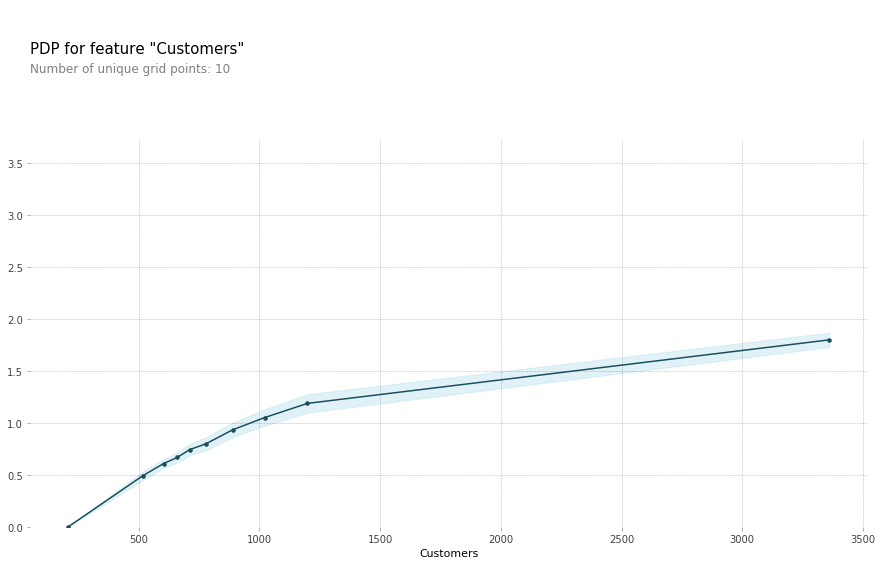

In [23]:
#Partial Dependency Plot, 1 feature isolation
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Customers'

isolated = pdp_isolate(
    model=model, 
    dataset=xve, 
    model_features=xve.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

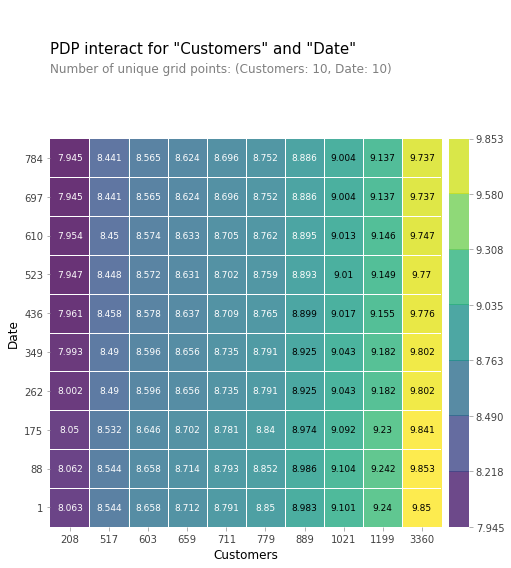

In [24]:
#Partial Dependency Plot, 2 feature interaction
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['Customers', 'Date']

interaction = pdp_interact(
    model=model, 
    dataset=xve, 
    model_features=xve.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);